In [ ]:
#hide
from criminologia_cdmx.etl import *
from criminologia_cdmx.patrones_espacio_temporales import *
from criminologia_cdmx.covariables import *
from criminologia_cdmx.modelos import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import contextily as ctx

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# criminologia_cdmx

> Herramientas para el análisis espacial de la delincuencia en la CDMX.

## Instalación

La forma más sencilla de instalarlo es creando un environment de conda que tenga geopandas instalado y después usar `pip` para instalar la librería dese el repositorio:


````bash
conda create -n criminologia python=3.7
conda install -c conda-forge geopandas
pip install git+https://github.com/CentroGeo/criminologia_cdmx
````

Por lo pronto, como el repositorio es privado Git va a pedir usuario y contraseña de GitHub.

Alternativamente, si tienes el repositorio clonado en la computadora:

````bash
conda create -n criminologia python=3.7
conda install -c conda-forge geopandas
pip install git+file///ruta/a/criminologia_cdmx
````

## Uso

## ETL
````Python
from criminologia_cdmx.etl import *
````

### Bajar datos abiertos

Podemos bajar dos fuentes de datos: [carpetas de investigación](https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico) y [víctimas en carpetas de investigación](https://datos.cdmx.gob.mx/dataset/victimas-en-carpetas-de-investigacion-fgj/resource/d543a7b1-f8cb-439f-8a5c-e56c5479eeb5).

Hay dos formas de bajar los datos abiertos, la primera es usando el api que baja las primeras `limit` carpetas/víctimas de la base abierta

In [ ]:
carpetas = get_carpetas_from_api(limit=100)
carpetas.head()

,_id,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,...,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,geometry
0,131438,2011,Diciembre,2011-12-23 12:00:00,2016,Octubre,2016-10-11T10:58:59,FRAUDE,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS FINA...,T,...,DELITO DE BAJO IMPACTO,NO SE PRECISA,LA CORUÑA,VIADUCTO PIEDAD,IZTACALCO,NaN,-99.1310879999999,19.4003803998337,NaN,POINT (-99.13109 19.40038)
1,131439,2016,Octubre,2016-10-11 10:00:00,2016,Octubre,2016-10-11T11:05:39,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,INVESTIGACIÓN EN BENITO JUÁREZ,URI-BJ-4,...,DELITO DE BAJO IMPACTO,TOLEDO,NaN,ÁLAMOS,BENITO JUAREZ,NaN,-99.1382219,19.3955250998333,NaN,POINT (-99.13822 19.39553)
2,131440,2016,Octubre,2016-10-10 18:00:00,2016,Octubre,2016-10-11T11:06:45,ROBO DE ACCESORIOS DE AUTO,INVESTIGACIÓN EN IZTACALCO,IZC-2,...,DELITO DE BAJO IMPACTO,CANELA 469 EDIFICIO E,RESINA,GRANJAS MÉXICO,IZTACALCO,NaN,-99.0949096468644,19.3975309850492,NaN,POINT (-99.09491 19.39753)
3,131441,2016,Octubre,2016-10-10 23:30:00,2016,Octubre,2016-10-11T11:15:54,ROBO DE DOCUMENTOS,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,...,DELITO DE BAJO IMPACTO,GUANAJUATO,HIDALGO,BUENAVISTA,IZTAPALAPA,NaN,-99.0330593,19.328085399834,NaN,POINT (-99.03306 19.32809)
4,131442,2016,Octubre,2016-10-11 06:30:00,2016,Octubre,2016-10-11T11:16:19,ROBO A NEGOCIO SIN VIOLENCIA,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,...,DELITO DE BAJO IMPACTO,GUTEMBERG,NaN,VERONICA ANZURES,MIGUEL HIDALGO,NaN,-99.1721142279077,19.4335004163422,NaN,POINT (-99.17211 19.43350)


In [ ]:
victimas = get_victimas_from_api(limit=100)
victimas.head()

,_id,idCarpeta,Ano_inicio,Mes_inicio,FechaInicio,delito,categoria,Sexo,Edad,TipoPersona,...,fecha_hechos,HoraHecho,HoraInicio,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud,geometry
0,1,8324429,2019,Enero,2019-04-01T00:00:00,FRAUDE,DELITO DE BAJO IMPACTO,Masculino,62,FISICA,...,2018-08-29,12:00:00,12:19:00,ALVARO OBREGON,GUADALUPE INN,INSUGENTES SUR,NaN,19.36125,-99.18314,POINT (-99.18314 19.36125)
1,2,8324430,2019,Enero,2019-04-01T00:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,Femenino,38,FISICA,...,2018-12-15,15:00:00,12:20:00,AZCAPOTZALCO,VICTORIA DE LAS DEMOCRACIAS,AV. CUATLAHUAC,NaN,19.47181,-99.16458,POINT (-99.16458 19.47181)
2,3,8324431,2019,Enero,2019-04-01T00:00:00,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42,FISICA,...,2018-12-22,15:30:00,12:23:00,COYOACAN,COPILCO UNIVERSIDAD ISSSTE,COPILCO,NaN,19.33797,-99.18611,POINT (-99.18611 19.33797)
3,4,8324435,2019,Enero,2019-04-01T00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,35,FISICA,...,2019-01-04,06:00:00,12:27:00,IZTACALCO,AGRÍCOLA PANTITLAN,CALLE 6,ENTRE PRIVADA DEL VALLE Y PRIVADA GONZALEZ,19.40327,-99.05983,POINT (-99.05983 19.40327)
4,5,8324438,2019,Enero,2019-04-01T00:00:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,...,2019-01-03,20:00:00,12:35:00,IZTAPALAPA,PROGRESISTA,UNIVERSIDAD,NaN,19.3548,-99.06324,POINT (-99.06324 19.35480)


La segunda es bajar el histórico completo:

````Python
carpetas_todas = get_historico_carpetas()
victimas_todas = get_historico_victimas()
````

También es posible procesar los datos a partir de un archivo guardado en la computadora, ya sea obtenido de la página de datos abiertos o guardado con las funciones `get_historico_carpetas`/`get_historico_victimas`.

````Python
carpetas = get_carpetas_desde_archivo("path-a-los-datos")
victimas_todas = get_victimas_desde_archivo("path-a-los-datos")
````

### Agregar identificadores espaciales (carpetas o victimas)

Para agregar los identificadores de colonia y cuadrante:

In [ ]:
carpetas = agrega_ids_espaciales(carpetas)
carpetas.head()

,_id,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,...,alcaldia_hechos,competencia,longitud,latitud,tempo,geometry,colonia_cve,colonia_nombre,municipio_cvegeo,cuadrante_id
0,131438,2011,Diciembre,2011-12-23 12:00:00,2016,Octubre,2016-10-11T10:58:59,FRAUDE,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS FINA...,T,...,IZTACALCO,NaN,-99.1310879999999,19.4003803998337,NaN,POINT (-99.13109 19.40038),209,VIADUCTO PIEDAD,09006,021
1,131439,2016,Octubre,2016-10-11 10:00:00,2016,Octubre,2016-10-11T11:05:39,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,INVESTIGACIÓN EN BENITO JUÁREZ,URI-BJ-4,...,BENITO JUAREZ,NaN,-99.1382219,19.3955250998333,NaN,POINT (-99.13822 19.39553),941,ALAMOS II,09014,014
2,131440,2016,Octubre,2016-10-10 18:00:00,2016,Octubre,2016-10-11T11:06:45,ROBO DE ACCESORIOS DE AUTO,INVESTIGACIÓN EN IZTACALCO,IZC-2,...,IZTACALCO,NaN,-99.0949096468644,19.3975309850492,NaN,POINT (-99.09491 19.39753),233,GRANJAS MEXICO II,09006,024
3,131441,2016,Octubre,2016-10-10 23:30:00,2016,Octubre,2016-10-11T11:15:54,ROBO DE DOCUMENTOS,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,...,IZTAPALAPA,NaN,-99.0330593,19.328085399834,NaN,POINT (-99.03306 19.32809),1407,BUENAVISTA II,09007,017
4,131442,2016,Octubre,2016-10-11 06:30:00,2016,Octubre,2016-10-11T11:16:19,ROBO A NEGOCIO SIN VIOLENCIA,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,...,MIGUEL HIDALGO,NaN,-99.1721142279077,19.4335004163422,NaN,POINT (-99.17211 19.43350),203,VERONICA ANZURES,09016,0421


In [ ]:
victimas = agrega_ids_espaciales(victimas)
victimas.head()

,_id,idCarpeta,Ano_inicio,Mes_inicio,FechaInicio,delito,categoria,Sexo,Edad,TipoPersona,...,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud,geometry,colonia_cve,colonia_nombre,municipio_cvegeo,cuadrante_id
0,1,8324429,2019,Enero,2019-04-01T00:00:00,FRAUDE,DELITO DE BAJO IMPACTO,Masculino,62,FISICA,...,GUADALUPE INN,INSUGENTES SUR,NaN,19.36125,-99.18314,POINT (-99.18314 19.36125),263,GUADALUPE INN,09010,012
1,2,8324430,2019,Enero,2019-04-01T00:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,Femenino,38,FISICA,...,VICTORIA DE LAS DEMOCRACIAS,AV. CUATLAHUAC,NaN,19.47181,-99.16458,POINT (-99.16458 19.47181),683,VICTORIA DE LAS DEMOCRACIAS,09002,026
2,3,8324431,2019,Enero,2019-04-01T00:00:00,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42,FISICA,...,COPILCO UNIVERSIDAD ISSSTE,COPILCO,NaN,19.33797,-99.18611,POINT (-99.18611 19.33797),328,COPILCO EL BAJO,09003,0213
3,4,8324435,2019,Enero,2019-04-01T00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,35,FISICA,...,AGRÍCOLA PANTITLAN,CALLE 6,ENTRE PRIVADA DEL VALLE Y PRIVADA GONZALEZ,19.40327,-99.05983,POINT (-99.05983 19.40327),227,PANTITLAN V,09006,026
4,5,8324438,2019,Enero,2019-04-01T00:00:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,...,PROGRESISTA,UNIVERSIDAD,NaN,19.3548,-99.06324,POINT (-99.06324 19.35480),1366,LAS AMERICAS (U HAB),09007,0116


### Agregar categorías de usuario

Para clasificar las carpetas de investigación de acuerdo a una categorización definida por el usuario necesitamos un archivo que relacione la columna delitos de la base de carpetas con las categorías definidas por el usuario

In [ ]:
categorias = pd.read_csv("datos/categorias_carpetas.csv")
categorias

,incidente,categoria
0,HOMICIDIO POR AHORCAMIENTO,Homicidios dolosos
1,HOMICIDIO POR ARMA BLANCA,Homicidios dolosos
2,HOMICIDIO POR ARMA DE FUEGO,Homicidios dolosos
3,HOMICIDIO POR GOLPES,Homicidios dolosos
4,HOMICIDIOS INTENCIONALES (OTROS),Homicidios dolosos
...,...,...
73,ROBO DE VEHICULO DE SERVICIO PÚBLICO CON VIOLE...,Robo de/en vehículo
74,ROBO DE VEHICULO DE SERVICIO PÚBLICO SIN VIOLE...,Robo de/en vehículo
75,ROBO DE VEHICULO ELECTRICO MOTOPATIN,Robo de/en vehículo
76,"OBO DE VEHICULO EN PENSION, TALLER Y AGENCIAS C/V",Robo de/en vehículo


Entonces podemos agregar las categorías a nuestra base

In [ ]:
carpetas = agregar_categorias_carpetas(carpetas)
carpetas[['delito', 'categoria']]

,delito,categoria
0,FRAUDE,NaN
1,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,Robo a transeúnte
2,ROBO DE ACCESORIOS DE AUTO,Robo de/en vehículo
3,ROBO DE DOCUMENTOS,NaN
4,ROBO A NEGOCIO SIN VIOLENCIA,Robo a negocio
...,...,...
91,AMENAZAS,NaN
92,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,NaN
93,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,Robo de/en vehículo
94,ROBO DE MOTOCICLETA CON VIOLENCIA,NaN


Algo similar se puede hacer para los datos de Víctimas, en este caso el archivo de categorías es un poco diferente

In [ ]:
categorias_victimas = pd.read_csv("datos/categorias_victimas.csv")
categorias_victimas

,Delito,Categoria,Cantidad,Nivel 1,Nivel 2,Nivel 3
0,ABORTO,DELITO DE BAJO IMPACTO,168,NaN,NaN,NaN
1,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,DELITO DE BAJO IMPACTO,5924,NaN,NaN,NaN
2,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,12050,Abuso de Confianza,NaN,NaN
3,ABUSO SEXUAL,DELITO DE BAJO IMPACTO,10238,Abuso Sexual,NaN,NaN
4,ACOSO SEXUAL,DELITO DE BAJO IMPACTO,2986,NaN,NaN,NaN
...,...,...,...,...,...,...
295,VIOLACION TUMULTUARIA,VIOLACIÓN,74,NaN,NaN,NaN
296,VIOLACION TUMULTUARIA EQUIPARADA,VIOLACIÓN,4,NaN,NaN,NaN
297,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,VIOLACIÓN,2,NaN,NaN,NaN
298,VIOLACION Y ROBO DE VEHICULO,VIOLACIÓN,1,NaN,NaN,NaN


Las columnas importantes son `Nivel 1` y `Nivel 2` (podría haber más niveles), esas definen las categorías que se van a asignar a cada fila que se una a los datos de víctimas via la columna `Delito`

In [ ]:
victimas = agregar_categorias_victimas(victimas)
victimas[['Delito', 'Nivel 1', 'Nivel 2', 'Nivel 3']]

,Delito,Nivel 1,Nivel 2,Nivel 3
0,FRAUDE,Fraude,NaN,NaN
1,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",NaN,NaN,NaN
2,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,NaN,NaN,NaN
3,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,Robo de Vehículo de Servicio Particular,Sin Violencia,NaN
4,ROBO DE MOTOCICLETA SIN VIOLENCIA,NaN,NaN,NaN
...,...,...,...,...
90,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,Robo de Vehículo de Servicio Particular,Con Violencia,NaN
91,ABUSO DE CONFIANZA,Abuso de Confianza,NaN,NaN
92,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,Robo de Vehículo de Servicio Particular,Sin Violencia,NaN
93,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,Robo a Transeúnte en Vía Pública,Con Violencia,NaN


### Exportar datos para el visualizador

In [ ]:
exporta_datos_visualizador(carpetas, "datos/salidas/carpetas.csv", tipo='carpetas')
exporta_datos_visualizador(victimas, "datos/salidas/victimas.csv", tipo='victimas')

### Serie de tiempo por categoría

````Python
serie = serie_de_tiempo_categoria(carpetas_todas, pd.to_datetime('01/01/2016'), 'Robo a pasajero')
````

### Serie de tiempo por geografía y categoría
````Python
serie = serie_tiempo_categorias_unidades(victimas, pd.to_datetime('01/01/2019'))
````

## Patrones espacio temporales

Este módulo tiene diferentes herramientas para explorar los patrones espacio-temporales de la actividad delictiva
````Python
from criminologia_cdmx.patrones_espacio_temporales import *
````

### Estimación de densidad de kernel
A partir de cualquier capa de incidentes se puede estimar el KDE utilizando validación cruzada para encontrar el mejor bandwidth

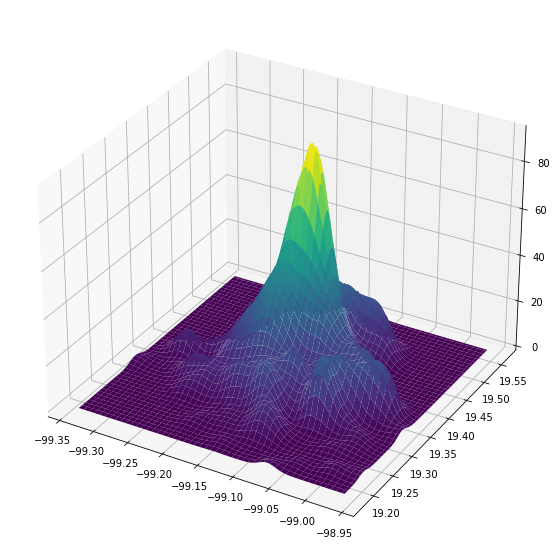

In [ ]:
carpetas = get_carpetas_from_api(1000)
x = carpetas.geometry.x.to_numpy()
y = carpetas.geometry.y.to_numpy()
params = {'bandwidth': np.linspace(0.001, 0.1, 100)}
bw = ajusta_bandwidth_kde(x, y, params)
xx, yy, zz = kde2D(x, y, bw, xbins=100j, ybins=100j)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz,cmap='viridis', edgecolor='none')

### Serie de tiempo de KDEs por categoría

Para una categoría determinada se obtiene la serie de tiempo de densidades de Kernel para un periodo arbitrario, utilizando la agregación temporal determinada por el usuario.

Para usar esta función no es necesario agregar los ids de unidades espaciales.

````Python

carpetas = get_carpetas_desde_archivo()
carpetas = agregar_categorias_carpetas(carpetas)
fechas = pd.date_range(start='1/1/2019', end='1/1/2021', freq='M').to_list()
xx, yy, kdes = serie_tiempo_kde_categoria(carpetas, 
                                          fechas, 
                                          ["Homicidios dolosos"], 
                                          "30 days")
````

Ya teniendo la serie de KDEs es relatívamente fácil obtener una animación de la evolución utilizando el siguiente código. Es necesario instalar la extensión [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/):
````Python

import matplotlib.animation as animation
def data(t):
    d = kdes[t]
    ax.clear()
    surf = ax.plot_surface(XX, YY, d[2], cmap='viridis', edgecolor='none', 
                           antialiased=False)
    ax.set_zlim([0,50]) 


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, kdes[0][2],cmap='viridis', edgecolor='none', antialiased=False)
ax.set_zlim(0, 50)
ani = animation.FuncAnimation(fig, data, len(kdes), interval=50, repeat=False )
plt.show()
````

### Mapas de intensidad relativa y significancia

Además de producir las superficies de probabilidad para cada categoría de delitos, es posible comparar dos categorías y estimar la significancia de las diferencias

Text(0.5, 1.0, 'Significancia de la intensidad')

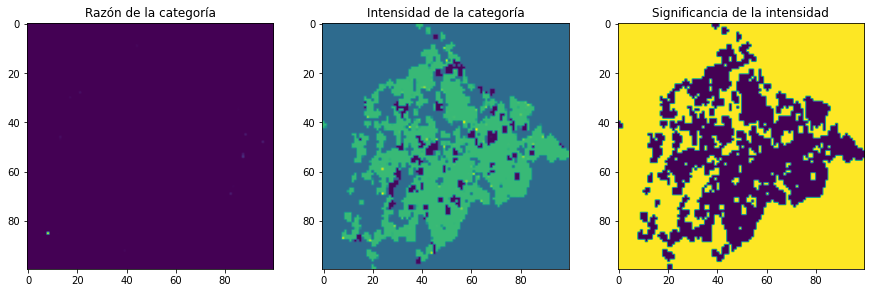

In [ ]:
carpetas_todas = get_carpetas_desde_archivo('datos/descargas/carpetas_fiscalia.csv')
carpetas_todas = agregar_categorias_carpetas(carpetas_todas)
fechas = pd.date_range(start='1/1/2019', end='3/1/2019', freq='M').to_list()
razones, intensidades = serie_mapas_intensidad(carpetas_todas, 
                                               fechas,
                                               'Homicidios dolosos',
                                               "30 days", bw=0.001)
significancias = p_value_maps(razones)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(razones[0])
ax1.set_title("Razón de la categoría")
ax2.imshow(intensidades[0])
ax2.set_title("Intensidad de la categoría")
ax3.imshow(significancias[0])
ax3.set_title("Significancia de la intensidad")

### Agregar en hexágonos

Se puede agregar los datos de carpetas/victimas en hexágonos de Uber H3 usando la función `agrega_en_hexagonos` y pasándole los datos y el nivel de escala. Por ejemplo, para agregar los datos en el nivel 8

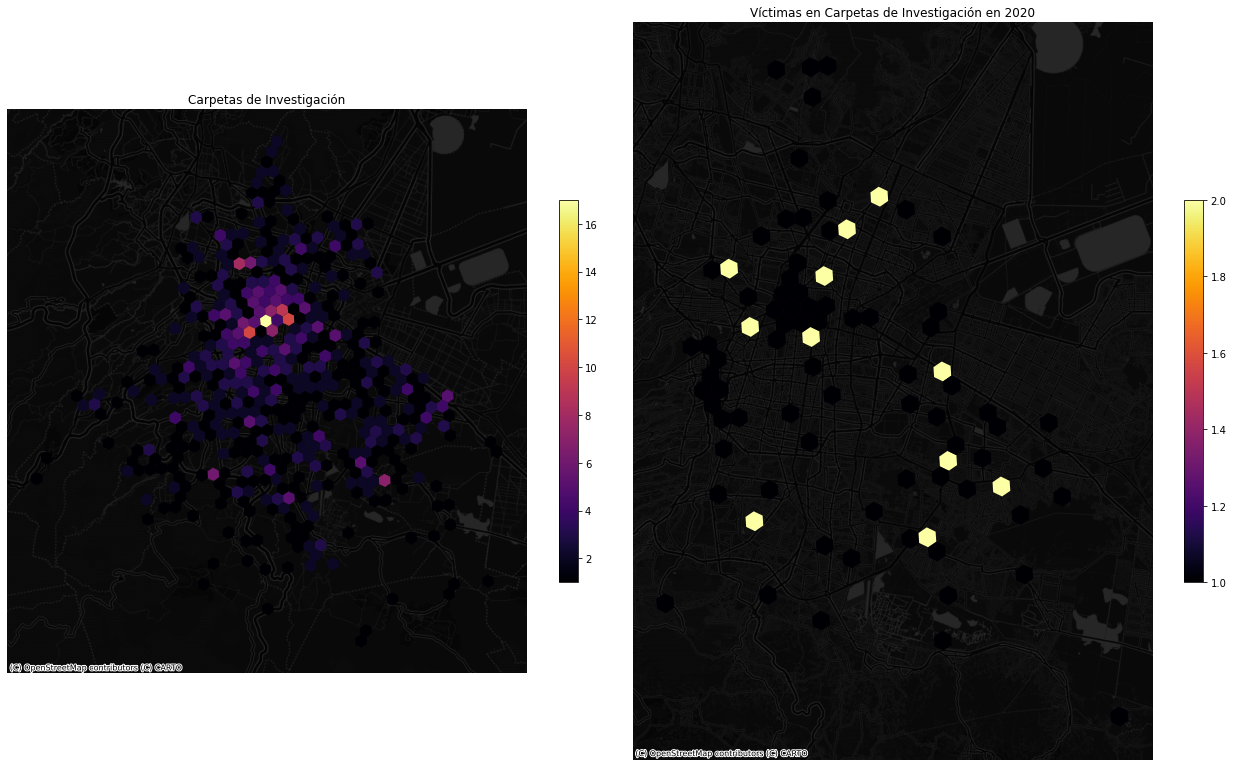

In [ ]:
carpetas_hex = agrega_en_hexagonos(carpetas, 8)
victimas_hex = agrega_en_hexagonos(victimas, 8)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 18))
ax0 = (carpetas_hex
       .to_crs(epsg=3857)
       .plot('incidentes', 
             ax=ax0, 
             legend=True,
             cmap='inferno',
             legend_kwds={'shrink': 0.3},))
ax0.set_title("Carpetas de Investigación")
ax0.set_axis_off()
ctx.add_basemap(ax0, source=ctx.providers.CartoDB.DarkMatterNoLabels)
ax1 = (victimas_hex
       .to_crs(epsg=3857)
       .plot('incidentes', 
             ax=ax1, 
             legend=True,
             cmap='inferno',
             legend_kwds={'shrink': 0.3}))
ax1.set_title("Víctimas en Carpetas de Investigación en 2020")
ax1.set_axis_off()
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.DarkMatterNoLabels)
plt.tight_layout()

## Covariables

Este módulo contiene diferentes funciones y clases para construir covariables para el analisis de delitos.
````Python
from criminologia_cdmx. covariables import *
````
Antes de utilizar este módulo es necesario descargar los datos:

````Python
descarga_datos_covariables()
````

Después de descargar los datos es posible utilizar todas las funciones del módulo.

### Variables censales

El módulo contiene diferentes funciones para procesar las variables del censo, un flujo típico de trabajo consistiría en:

* Leer el censo a nivel manzana
* Agregar en colonias
* Calcular las tasas de las variables

In [ ]:
diccionario = get_diccionario_censo()
censo = get_variables_censo()
agregado = agrega_en_unidades(censo, diccionario, imputacion='random')
agregado = censo_a_tasas(agregado, diccionario)
agregado

,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,...,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,OCUPVIVPAR,PROM_OCUP_C
colonia_cve,,,,,,,,,,,,,,,,,,,,,
1,80.0,1.025000,1.037500,1.075000,1.050000,0.912500,0.987500,1.012500,1.050000,0.775000,...,1.024691,0.888889,1.135802,1.000000,0.962963,0.925926,0.987654,0.876543,91.0,0.168831
2,96.0,1.072917,0.979167,1.125000,1.135417,1.177083,1.125000,0.937500,1.229167,1.052083,...,1.086538,1.019231,0.884615,1.067308,0.721154,0.932692,1.163462,0.903846,113.0,0.197208
3,18.0,1.388889,1.222222,1.500000,0.944444,1.277778,1.277778,1.388889,1.055556,1.166667,...,1.571429,0.952381,1.190476,1.333333,0.809524,1.047619,1.000000,0.761905,21.0,0.157895
4,46.0,1.173913,1.152174,0.913043,0.978261,0.956522,0.847826,0.978261,1.021739,1.065217,...,1.200000,0.875000,1.525000,0.950000,1.300000,1.150000,1.225000,1.175000,55.0,0.214008
5,66.0,0.848485,1.075758,1.136364,1.212121,1.090909,0.984848,0.909091,1.045455,1.075758,...,0.928571,0.900000,0.914286,1.014286,1.057143,0.971429,0.985714,0.942857,74.0,0.180488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,98.0,0.908163,1.000000,0.918367,0.969388,1.081633,0.948980,0.836735,0.928571,0.857143,...,0.858586,0.868687,0.969697,0.808081,1.040404,0.939394,0.939394,0.979798,80.0,0.141593
1821,208.0,0.927885,1.014423,1.173077,0.870192,1.062500,1.009615,0.947115,1.019231,0.932692,...,0.976077,0.937799,1.004785,1.057416,1.023923,1.000000,1.062201,0.995215,197.0,0.153188
1822,2.0,3.000000,3.000000,2.500000,2.500000,5.000000,2.500000,3.500000,6.000000,1.000000,...,0.666667,1.500000,1.333333,2.000000,1.000000,0.833333,1.000000,1.500000,7.0,0.205882


### Variables de Uso de Suelo

El módulo de covariables incluye (por lo pronto) algunas pocas variables sobre el uso de suelo:

* Cantidad de usos de comercio al por menor
* Cantidad de usos de industria
* Cantidad de usos de servicios

Estas variables están a nivel manzana, pero por lo pronto no es posible (¿conveniente?) usarlas en esa escala, entonces tenemos un método para agregarlas a nivel cuadrante o colonia (eventualmente habrá forma de usar agregaciones arbitrarias). Cuando se agregan los usos a colonias o cuadrantes se calculan también dos variables extra:

* Intensidad: la cantidad de total de usos de suelo considerados
* Entropía: una medida de la mezcla de los usos de suelo

In [ ]:
usos = get_uso_de_suelo()
usos = agrega_uso_suelo(usos, unidades='colonias')
usos

,Industria,Comercio,Servicios,Intensidad,Entropía
colonia_cve,,,,,
1,8,87,44,139,-4.072303
2,15,112,55,182,-3.803105
3,2,22,7,31,-4.161488
4,9,55,31,95,-3.661970
5,31,144,66,241,-3.514375
...,...,...,...,...,...
1820,45,255,213,513,-3.651524
1821,135,1074,733,1942,-3.852911
1822,1,18,12,31,-4.484460


### Índices PCA

Para facilitar la construcción de modelos utilizando variables censales, proveemos una clase para construir índices basados en Componentes principales a partir de una lista de variables del Censo.

Construir un índice es muy sencillo, primero se seleccionan un conjunto de variables:

In [ ]:
vars_indice = ['P5_HLI', 'POB_AFRO', 'PCON_DISC', 'P3A5_NOA', 
               'P6A11_NOA', 'P12A14NOA', 'P15YM_AN', 'PSINDER', 'PDESOCUP']
diccionario[diccionario['Nombre del Campo'].isin(vars_indice)][['Nombre del Campo', 'Descripción']]

,Nombre del Campo,Descripción
69,P5_HLI,Personas de 5 a 130 años de edad que hablan al...
73,POB_AFRO,Personas que se consideran afromexicanos o afr...
76,PCON_DISC,Personas que realizan con mucha dificultad o n...
92,P3A5_NOA,Personas de 3 a 5 años de edad que no van a la...
95,P6A11_NOA,Personas de 6 a 11 años de edad que no van a l...
98,P12A14NOA,Personas de 12 a 14 años de edad que no van a ...
110,P15YM_AN,Personas de 15 a 130 años de edad que no saben...
143,PDESOCUP,Personas de 12 a 130 años de edad que no tenía...
146,PSINDER,Total de personas que no están afiliadas a ser...


Con la lista de variables se inicializa la clase y se calcula el índice. En este caso vamos a usar los agregados por colonia que calculamos antes.  

In [ ]:
indice = IndicePCA(agregado, vars_indice)
indice.calcula_indice()
print(f'El porcentaje de la varianza explicada por el índice es {indice.varianza_explicada[0]}')

El porcentaje de la varianza explicada por el índice es 0.6733575453347628


El DataFrame con los valores del índice se guarda en la propiedad `indice`:

In [ ]:
indice.indice

,colonia_cve,Índice
0,1,-0.283277
1,2,-0.231614
2,3,0.541123
3,4,-1.054452
4,5,-0.372295
...,...,...
1796,1820,-0.650093
1797,1821,-0.576023
1798,1822,10.963350
1799,1823,0.299546


## Modelos

Este módulo contiene funciones y clases para ajustar diferentes tipos de modelos para el analisis criminológico.

````Python
from criminologia_cdmx.modelos import *
````

El módulo incluye funciones para procesar variables dependientes, crear capas de análisis y ajustar modelos.

La `CapaDeAnalisis` es la unidad base de este módulo, es un contenedor para las variables dependiente e independientes.

A continuación se muestra un flujo completo para ajustar un modelo GLM usando la familia Binomial Negativa.

### Variable dependiente

In [ ]:
carpetas = get_carpetas_from_api(100000)
carpetas = agrega_ids_espaciales(carpetas)
fecha_inicio = carpetas.fecha_hechos.min().strftime("%d-%m.%Y")
fecha_fin = carpetas.fecha_hechos.max().strftime("%d-%m.%Y")
delito = ['ROBO A CASA HABITACION SIN VIOLENCIA']
Y = variable_dependiente(carpetas, 'delito', delito, fecha_inicio, fecha_fin)
Y.head()

,colonia_cve,ROBO A CASA HABITACION SIN VIOLENCIA
0,32,0.0
1,619,1.0
2,1792,0.0
3,1774,0.0
4,583,0.0


### Covariables
Para este ejemplo sólo vamos a usar uso de suelo

In [ ]:
usos = get_uso_de_suelo()
usos = agrega_uso_suelo(usos, unidades='colonias')

### Capa de Análisis

In [ ]:
ca = CapaDeAnalisis(Y, usos, 'colonias')

### Creación y ajuste de modelo

In [ ]:
m = ModeloGLM(ca, sm.families.NegativeBinomial())
fm = m.fit()
fm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     Q('ROBO A CASA HABITACION SIN VIOLENCIA')   No. Observations:                 1619
Model:                                                   GLM   Df Residuals:                     1614
Model Family:                               NegativeBinomial   Df Model:                            4
Link Function:                                           log   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -1454.6
Date:                                       Mon, 18 Apr 2022   Deviance:                       1149.7
Time:                                               16:17:13   Pearson chi2:                 1.25e+03
No. Iterations:                                          100                                         
Covariance Type:                                   nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.0145      0.318     -6.332      0.000      -2.638      -1.391
Q('Industria')      0.0041      0.001      3.505      0.000       0.002       0.006
Q('Comercio')      -0.0029      0.000     -5.959      0.000      -0.004      -0.002
Q('Servicios')      0.0009      0.000      1.924      0.054   -1.68e-05       0.002
Q('Intensidad')     0.0021      0.000      6.550      0.000       0.001       0.003
Q('Entropía')      -0.1935      0.082     -2.372      0.018      -0.353      -0.034
===================================================================================
"""